# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Classwork-4 4/20/2024

## Reddit API 
The below code initializes a connection to Reddit's API using PRAW with specified credentials to programmatically interact with Reddit data.

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="nBP9OgcS9m3nP5Sc1OF03w",
    client_secret="H2N9fF4pv9lRPIaIpCgwi-NwilIszA",
    user_agent=user_agent
)

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import re 

The below code iterates over the posts in the "bitcoin" subreddit, prints various details of the first post

In [4]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
101
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


## This code collects the titles of all hot posts from the "bitcoin" subreddit using Reddit's API.

In [5]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

614


## Code to create a dataframe from the scrapped data 

In [6]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()


,0
0,"Technology constantly gets replaced, what’s st..."
1,HODLing For The Halvening
2,Bitcoin Optech Newsletter #298
3,Transfer bitcoin between accounts with differe...
4,Why isn’t there only 1 or max 100 bitcoin? Why...


This line of code modifies the DataFrame bitcoin_df by removing the first column

In [16]:
df = bitcoin_df.iloc[:, 1:]
bitcoin_df.head()

,0
0,"Technology constantly gets replaced, what’s st..."
1,HODLing For The Halvening
2,Bitcoin Optech Newsletter #298
3,Transfer bitcoin between accounts with differe...
4,Why isn’t there only 1 or max 100 bitcoin? Why...


In [17]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [18]:
bitcoin_df.columns = ['Titles']

In [19]:
bitcoin_df.head()

,Titles
0,"Technology constantly gets replaced, what’s st..."
1,HODLing For The Halvening
2,Bitcoin Optech Newsletter #298
3,Transfer bitcoin between accounts with differe...
4,Why isn’t there only 1 or max 100 bitcoin? Why...


In [20]:
bitcoin_df.Titles.duplicated().sum() 

0

## Create a function to clean the tweets

In [21]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,"Technology constantly gets replaced, what’s st..."
1,HODLing For The Halvening
2,Bitcoin Optech Newsletter 298
3,Transfer bitcoin between accounts with differe...
4,Why isn’t there only 1 or max 100 bitcoin? Why...


## Function  to remove emoji & Unicode from the reddit data.

In [22]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,"Technology constantly gets replaced, what’s st..."
1,HODLing For The Halvening
2,Bitcoin Optech Newsletter 298
3,Transfer bitcoin between accounts with differe...
4,Why isn’t there only 1 or max 100 bitcoin? Why...


## This code defines two functions using the TextBlob library to analyze sentiment in text.

In [23]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [24]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,"Technology constantly gets replaced, what’s st...",0.229167,0.0
1,HODLing For The Halvening,0.000000,0.0
2,Bitcoin Optech Newsletter 298,0.000000,0.0
3,Transfer bitcoin between accounts with differe...,0.600000,0.0
4,Why isn’t there only 1 or max 100 bitcoin? Why...,1.000000,0.0


## Function to group the range of Polarity to different categories

In [25]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Technology constantly gets replaced, what’s st...",0.229167,0.000000,Neutral
1,HODLing For The Halvening,0.000000,0.000000,Neutral
2,Bitcoin Optech Newsletter 298,0.000000,0.000000,Neutral
3,Transfer bitcoin between accounts with differe...,0.600000,0.000000,Neutral
4,Why isn’t there only 1 or max 100 bitcoin? Why...,1.000000,0.000000,Neutral
5,Most of you guys got it wrong. The goal is not...,0.700000,0.000000,Neutral
6,Are public addresses from the same private key...,0.393333,0.000000,Neutral
7,Bitcoin halving,0.000000,0.000000,Neutral
8,"""The Legendary Treasure of Satoshi Nakamoto"" -...",1.000000,1.000000,Positive
9,Still Early - Bitcoin CEO,0.300000,0.100000,Positive


## Function to plot the values count of sentiment

In [26]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

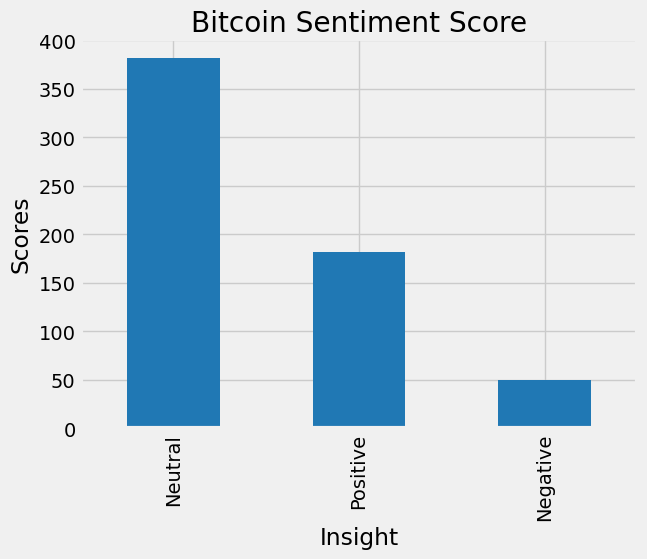

In [27]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Code to print the word cloud

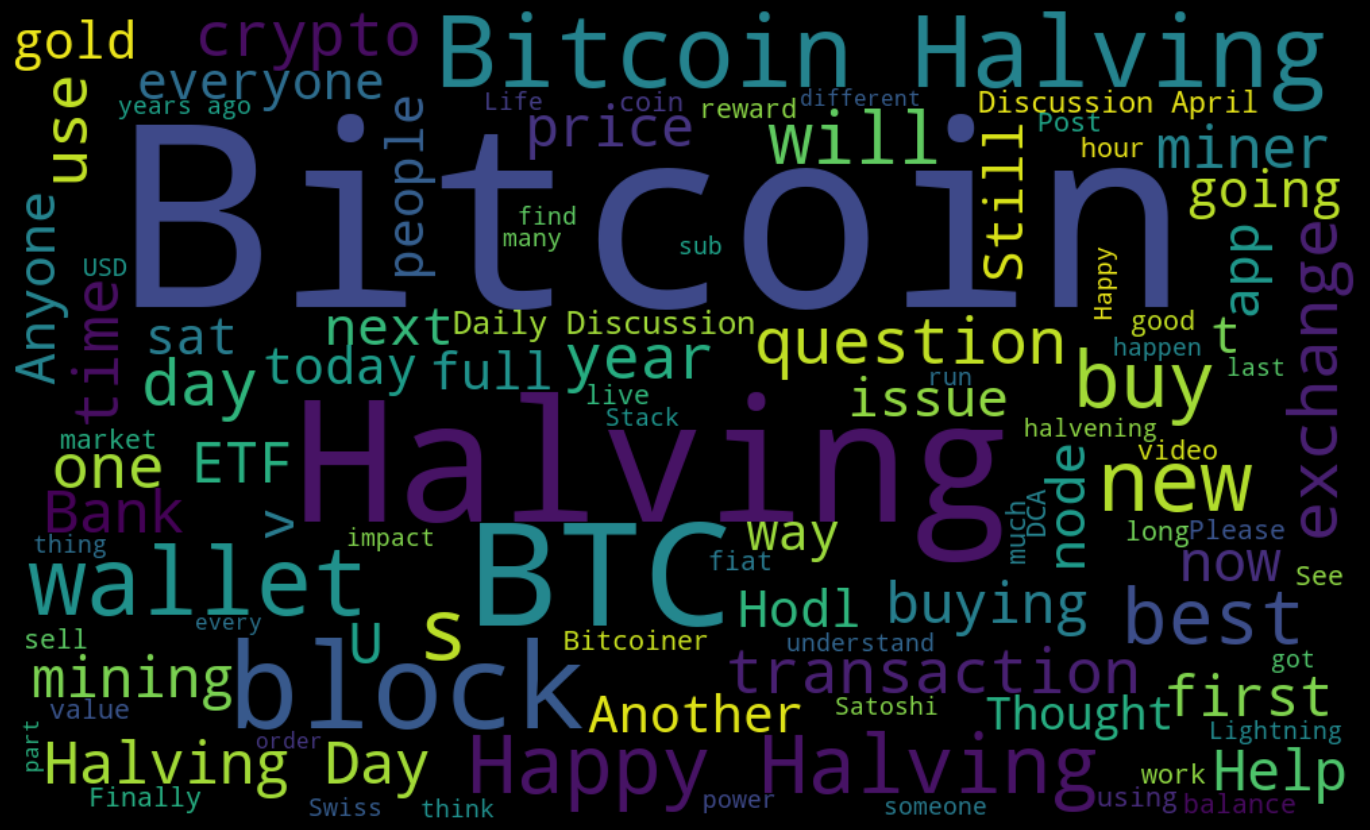

In [28]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");